In [14]:
import Library.BasicFun as bf

import sys
sys.path.append(sys.path[0]+'\\Library')
print(sys.path)

import torch as tc
import numpy as np
from Library import PhysModule as phy
from matplotlib import pyplot as plt

qc = tc.load('D:\\Manual\\Code\\tests\\GraduationProject\\Data\\qc.pth')

['d:\\Manual\\Code\\tests\\GraduationProject', 'd:\\Manual\\Code\\python\\python39.zip', 'd:\\Manual\\Code\\python\\DLLs', 'd:\\Manual\\Code\\python\\lib', 'd:\\Manual\\Code\\python', '', 'd:\\Manual\\Code\\python\\lib\\site-packages', 'd:\\Manual\\Code\\python\\lib\\site-packages\\pythtb-1.7.2-py3.9.egg', 'd:\\Manual\\Code\\python\\lib\\site-packages\\win32', 'd:\\Manual\\Code\\python\\lib\\site-packages\\win32\\lib', 'd:\\Manual\\Code\\python\\lib\\site-packages\\Pythonwin', 'd:\\Manual\\Code\\tests\\GraduationProject\\Library']


In [15]:
def mag_from_states(states):
    spin = phy.spin_operators('half', device='cpu')
    mag_z = list()
    for _ in range(states.shape[0]):
        mag_z.append(phy.magnetizations(states[_], [spin['sz']]))
    mag_z = tc.cat(mag_z, dim=0)
    mag_z_tot = mag_z.sum(dim=1) / mag_z.shape[1] # 不同时刻链的z方向总磁矩对链长做平均
    return mag_z_tot

(2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
torch.Size([1000, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
torch.Size([1000, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor(1.0000+1.9158e-20j, device='cuda:0', dtype=torch.complex128,
       grad_fn=<DivBackward0>)


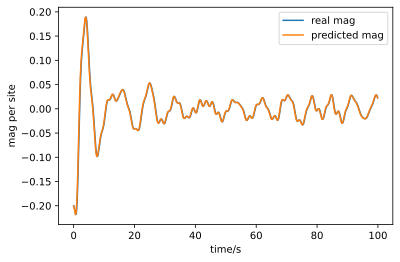

In [23]:
%config InlineBackend.figure_format="svg"
qc.single_state = False
states = np.load('D:\\Manual\\Code\\tests\\GraduationProject\\Data\\states.npy', allow_pickle=True)
print(states[0].shape)
data_real = tc.stack(list(tc.from_numpy(states)))
print(data_real.shape)

data_pred = qc(data_real.to('cuda:0'))
print(data_pred.shape)

def fidelity(psi1, psi0):
    f = 0
    for i in range(psi1.shape[0]):
        psi0_ = psi0[i]
        psi1_ = psi1[i]
        x_pos = list(range(len(psi1_.shape)))
        y_pos = x_pos
        f += bf.tmul(psi1_.conj(), psi0_, x_pos, y_pos)
    f = f/psi1.shape[0]
    return f
print(fidelity(data_pred, data_pred))

with tc.no_grad():
    mag_z_real_tot = mag_from_states(data_real)
    mag_z_pred_tot = mag_from_states(data_pred.to('cpu'))
    x = tc.arange(0, mag_z_pred_tot.shape[0]) * 0.1

    legends = []
    plt.plot(x, mag_z_real_tot, label='real mag')
    plt.plot(x, mag_z_pred_tot, label='predicted mag')
    plt.legend()
    plt.xlabel('time/s')
    plt.ylabel('mag per site')
    plt.show()